In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from time import sleep
import pyautogui as gui
import keyboard as kyb

In [19]:
gui.position()

Point(x=980, y=417)

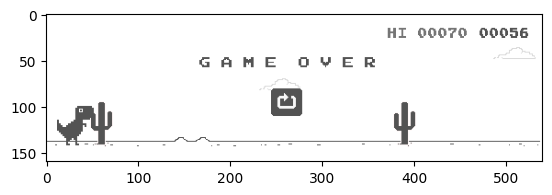

In [20]:
scr = gui.screenshot(region = (80,130,540,160))
plt.imshow(scr)

In [21]:
x = np.array([])
y = np.array([])
counter = 0
reg = (80,130,510,150)
inpsize = (reg[2]//5,reg[3]//5)
inpsize

(102, 30)

In [22]:
scale = 6
np.array([reg[2],reg[3]])//scale

array([85, 25], dtype=int32)

In [51]:
sleep(3)

while True:
    sleep(0.000001)
    print(f"\r{counter} {x.shape} {y.shape}          ",end="")

    frame = gui.screenshot(region = reg)
    frame = np.array(frame)
    frame = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    
    if kyb.is_pressed("esc"):
        print("done")
        break

    
    if kyb.is_pressed('space'):
        if counter == 0:
            x = np.array([cv2.resize(frame,inpsize)])
            y = np.array([1])
            counter+=1
            continue
        x = np.append(x,np.array([cv2.resize(frame,inpsize)]),axis=0) 
        y = np.append(y,np.array([1]),axis=0)
        counter+=1
        
    else:
        if counter == 0:
            x = np.array([cv2.resize(frame,inpsize)])
            y = np.array([0])
            counter+=1
            continue
        x = np.append(x,np.array([cv2.resize(frame,inpsize)]),axis=0) 
        y = np.append(y,np.array([0]),axis=0)
        counter+=1
        


5834 (5834, 30, 102) (5834,)          done


In [60]:


i = 20

1
65


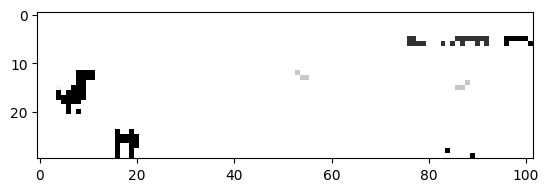

In [105]:

plt.imshow(x[i,:,:],cmap='gray')
print(y[i])
i+=1
print(i)

In [54]:
# x = x[:2100]
# y = y[:2100]

In [55]:
np.unique(y,return_counts=True)

(array([0, 1]), array([4880,  954], dtype=int64))

In [114]:
# p = np.random.permutation(y.size)
# x = x[p]
# y = y[p]

In [57]:
x.shape, y.shape

((5834, 30, 102), (5834,))

In [58]:
x = x/255

In [107]:
inpsize

(102, 30)

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [10]:
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='leaky_relu', input_shape=(inpsize[1], inpsize[0],1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='leaky_relu', input_shape=(inpsize[1], inpsize[0],1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='leaky_relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='leaky_relu'))
model.add(Dense(2,activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 100, 64)       640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 50, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 48, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 24, 64)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 22, 128)        73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 11, 128)      

In [11]:
model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.004),
    loss=tf.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

In [138]:
model.fit(x, y, batch_size=4, epochs=10,validation_split=.1,shuffle=True)

In [17]:
i = 400

In [18]:

pred = model.predict(np.array([x[i]]),verbose=0)
plt.imshow(x[i,:,:],cmap='gray')
print(i,y[i],pred,np.argmax(pred))
i+=1

IndexError: index 400 is out of bounds for axis 0 with size 0

In [ ]:
gui.click(x=340, y=235,duration=.3)
gui.click(x=340, y=635,duration=.2)


while True:
    frame = gui.screenshot(region = reg)   
    frame = cv2.resize(cv2.cvtColor(np.array(frame),cv2.COLOR_BGR2GRAY)/255,inpsize)  
    pred = model.predict(np.array([frame]),verbose=0)   
    if np.argmax(pred):
        gui.hotkey("space")
    print(f"\r{pred}        ",end=" ")

[[1.0000000e+00 9.1093915e-09]]           

In [23]:
frame = gui.screenshot(region = reg)
frame = cv2.resize(cv2.cvtColor(np.array(frame),cv2.COLOR_BGR2GRAY)/255,inpsize)

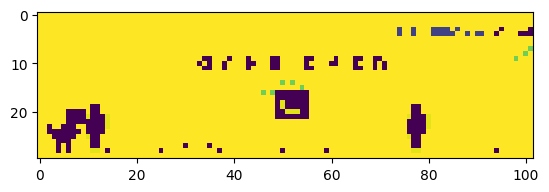

In [24]:
plt.imshow(frame)

In [25]:
pred = model.predict(np.array([x[i]]),verbose=0)
ans = np.argmax(pred)
ans,pred

IndexError: index 400 is out of bounds for axis 0 with size 0

In [144]:
model.save('dinobot.h5')

In [14]:
model = tf.keras.models.load_model('dinobot.h5')